In [11]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance


# MODELS 

* Random Forest Classifier
* Decision Tree Classifier
* Logistic Regression
* XGBoost

## DATA PREPROCESSING

In [12]:
dataPath = r"data\xAPI-Edu-Data.csv"
data = pd.read_csv(dataPath)

* To create a Training and Testing dataset, we are going to drop the following Columns that is not too relevant in the factors that affects student's performance. 
* We are also going to drop the **Class** column as it will be the target attribute for prediction/classification.
* We are goint to store the **Class** column in a different dataframe as the **Traget Attribute**.
* To do this, we're going to use the Pandas function **drop** and save the new dataframe to a **Features** variable. 
 

In [13]:
Features = data.drop(['Class','ParentAnsweringSurvey','ParentschoolSatisfaction','PlaceofBirth'],axis=1)
Target = data['Class']
Features.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,M,KW,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Under-7
1,M,KW,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Under-7
2,M,KW,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,Above-7
3,M,KW,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,Above-7
4,M,KW,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,Above-7


* Now using the Pandas' **head** function, we see the new content of the dataframe.
* We can notice that there are non-numerical attributes in this dataframe, we need to convert it to numerical before feeding to our model. 
* First let us look at the unique values of these non-numerical attributes, and then compare the result after converting to numerical to confirm if it is converted correctly as we want. 

In [14]:
print("gender attribute:", Features['gender'].unique())
print("NationalITy attribute:", Features['NationalITy'].unique())
print("StageID attribute:", Features['StageID'].unique())
print("GradeID attribute:", Features['GradeID'].unique())
print("SectionID attribute:", Features['SectionID'].unique())
print("Topic attribute:", Features['Topic'].unique())
print("StudentAbsenceDays attribute:", Features['StudentAbsenceDays'].unique())





gender attribute: ['M' 'F']
NationalITy attribute: ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
StageID attribute: ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID attribute: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID attribute: ['A' 'B' 'C']
Topic attribute: ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
StudentAbsenceDays attribute: ['Under-7' 'Above-7']


* We have a total of 7 non-numerical attribures with the following values shown above.
* Now, let's convert these to numerical values and see.
* To do this we're going to use a function called **LabelEncoder()**. This will automatically arrange each attributes' values and convert it into numerical values. 

In [15]:
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])
Features.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,1,4,2,1,0,7,0,0,15,16,2,20,1
1,1,4,2,1,0,7,0,0,20,20,3,25,1
2,1,4,2,1,0,7,0,0,10,7,0,30,0
3,1,4,2,1,0,7,0,0,30,25,5,35,0
4,1,4,2,1,0,7,0,0,40,50,12,50,0


* Now we can see that the content of the **Features** dataframe are now all numerical. 
* Let us see the difference between non-numerical and numerical values to see how it was converted.

In [16]:
print("gender attribute:", Features['gender'].unique())
print("NationalITy attribute:", Features['NationalITy'].unique())
print("StageID attribute:", Features['StageID'].unique())
print("GradeID attribute:", Features['GradeID'].unique())
print("SectionID attribute:", Features['SectionID'].unique())
print("Topic attribute:", Features['Topic'].unique())
print("StudentAbsenceDays attribute:", Features['StudentAbsenceDays'].unique())


gender attribute: [1 0]
NationalITy attribute: [ 4 12  0  8 11  3 13  1 10  6  9  7  2  5]
StageID attribute: [2 1 0]
GradeID attribute: [1 4 5 3 2 6 9 8 7 0]
SectionID attribute: [0 1 2]
Topic attribute: [ 7  8  0 10  3  9 11  4  6  1  2  5]
StudentAbsenceDays attribute: [1 0]


* From the result above, let us take for example the **NationalITy attribute**. 
* Comparing from these: **['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']**
* We can see that the **LabelEncoder** function encoded these values into numerical by taking its alphabetical order.


* Now, let us finally split the dataset into 80% and 20% ratio for training and test set respectively.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)


## TRAINING


* Now let us jump to training our models. 
* Let us start by defining the models that we are going to use.


In [23]:
models = {  'Logistic Regression':  LogisticRegression(), 
            'Decision Tree':        DecisionTreeClassifier(),
            'Random Forest':        RandomForestClassifier(),
            'XGBoost':              XGBClassifier()
         }


* Let us first use the default parameters of each models to have the baseline idea of the performance.
* Let us print the default parameters of each models below. 

In [30]:
import inspect
for k,v in models.items():
    mod = v
    print('Default Parameters for: ' + str(k) + '\n')
    print(mod.get_params())
    print('\n' + '\n')


Default Parameters for: Logistic Regression

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}



Default Parameters for: Decision Tree

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}



Default Parameters for: Random Forest

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples

### Here comes the actual training

In [22]:
keys = []
scores = []
for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

Results for: Logistic Regression

[[25  1  9]
 [ 0 21  1]
 [ 3  6 30]]
              precision    recall  f1-score   support

           H       0.89      0.71      0.79        35
           L       0.75      0.95      0.84        22
           M       0.75      0.77      0.76        39

    accuracy                           0.79        96
   macro avg       0.80      0.81      0.80        96
weighted avg       0.80      0.79      0.79        96

accuracy is 0.7916666666666666



Results for: Decision Tree

[[24  0 11]
 [ 0 20  2]
 [ 7  2 30]]
              precision    recall  f1-score   support

           H       0.77      0.69      0.73        35
           L       0.91      0.91      0.91        22
           M       0.70      0.77      0.73        39

    accuracy                           0.77        96
   macro avg       0.79      0.79      0.79        96
weighted avg       0.77      0.77      0.77        96

accuracy is 0.7708333333333334



Results for: Random Forest

[[27  

## Fine Tuning

* Now, let us look on the parameters that we can adjust to fine tune the models to achieve higher accuracy.



#### Number of Estimators 

* Let us start with the **Number of Estimators** for Random Forest Classifier
* **n_estimators** represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

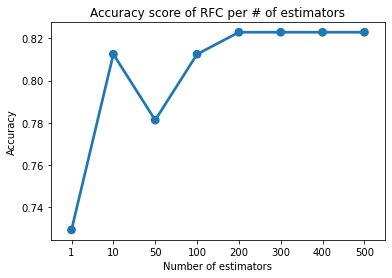

In [34]:
# Exploring the number of estimators in the random forest
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=52)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of estimators')
plt.show()

#### Maximum Depth

* **max_depth** represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the Accuracy and Number of depths.

* Now let us examine the effect of adjustig the **max_depths** for both **Radndom Forest Classifier** and **Decision Tree Classifier**


* Let us start with **Radndom Forest Classifier**

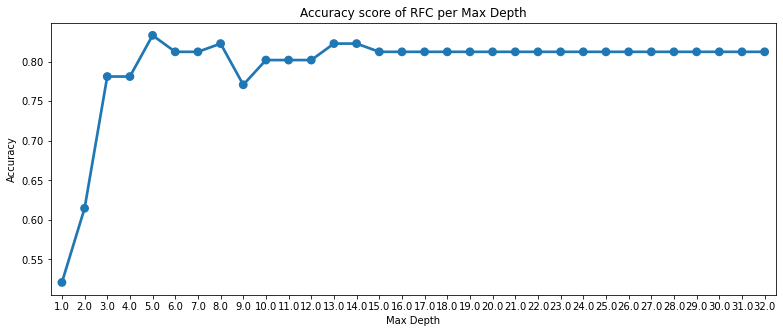

In [37]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
plt.figure(figsize=(13,5))
score = []
est = []
for d in max_depths:
    rfc1 = RandomForestClassifier(max_depth=d,random_state=52)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(d)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Max Depth', ylabel='Accuracy', 
         title='Accuracy score of RFC per Max Depth')
plt.show()

* Now for **Decision Tree Classifier**.

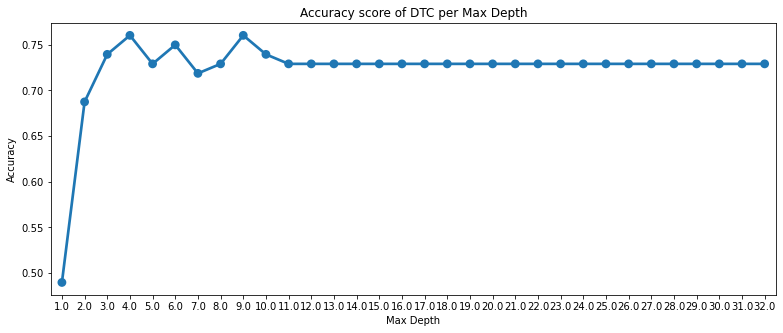

In [38]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
plt.figure(figsize=(13,5))
score = []
est = []
for d in max_depths:
    dt = DecisionTreeClassifier(max_depth=d,random_state=52)
    pred1 = dt.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(d)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Max Depth', ylabel='Accuracy', 
         title='Accuracy score of DTC per Max Depth')
plt.show()

#### Minimum Samples Split

* **min_samples_split** represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

* Let us start looking at adjusting this parameter for **Random Forest Classifier**

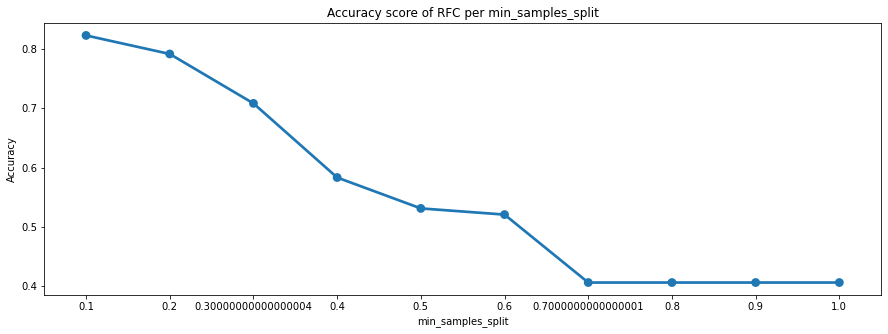

In [43]:

plt.figure(figsize=(15,5))
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
score = []
est = []
for s in min_samples_splits:
    rfc = RandomForestClassifier(min_samples_split=s,random_state=52)
    pred1 = rfc.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(s)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='min_samples_split', ylabel='Accuracy', 
         title='Accuracy score of RFC per min_samples_split')
plt.show()

* Now let us look at **Decision Tree Classifier**

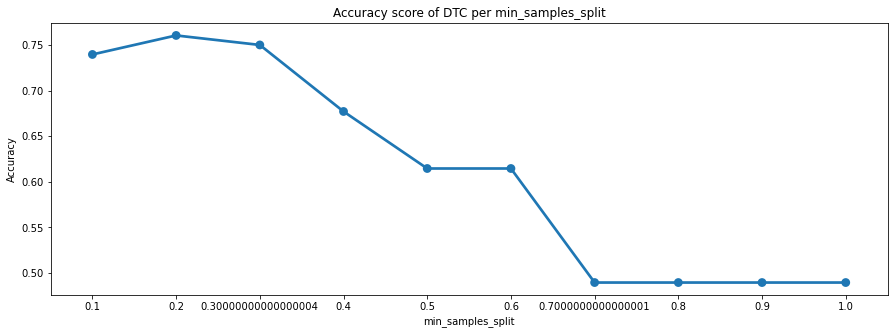

In [46]:

plt.figure(figsize=(15,5))
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
score = []
est = []
for s in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=s,random_state=52)
    pred1 = dt.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(s)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='min_samples_split', ylabel='Accuracy', 
         title='Accuracy score of DTC per min_samples_split')
plt.show()

* We can clearly see that when we require all of the samples at each node, the model cannot learn enough about the data. This is an underfitting case.

* Now let us apply these findings to train the RFC and DTC again and let us see if we can get better performance.

In [49]:
models = {  
        'Decision Tree':        DecisionTreeClassifier(max_depth = 4,min_samples_split = 0.2, random_state = 52),
        'Random Forest':        RandomForestClassifier(max_depth = 4,min_samples_split = 0.1, n_estimators = 200,random_state = 52 )
         }

keys = []
scores = []
for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

Results for: Decision Tree

[[28  0  7]
 [ 0 16  6]
 [11  2 26]]
              precision    recall  f1-score   support

           H       0.72      0.80      0.76        35
           L       0.89      0.73      0.80        22
           M       0.67      0.67      0.67        39

    accuracy                           0.73        96
   macro avg       0.76      0.73      0.74        96
weighted avg       0.74      0.73      0.73        96

accuracy is 0.7291666666666666



Results for: Random Forest

[[28  0  7]
 [ 0 18  4]
 [ 5  2 32]]
              precision    recall  f1-score   support

           H       0.85      0.80      0.82        35
           L       0.90      0.82      0.86        22
           M       0.74      0.82      0.78        39

    accuracy                           0.81        96
   macro avg       0.83      0.81      0.82        96
weighted avg       0.82      0.81      0.81        96

accuracy is 0.8125





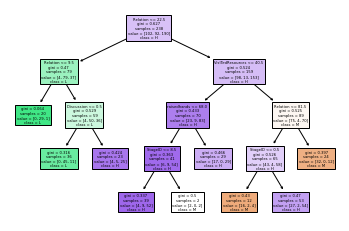

In [51]:
cols = data.columns.tolist()
labels =  data['Class'].unique()

rfs = models['Random Forest']
plot_tree(rfs.estimators_[0], filled=True, feature_names = cols, class_names = labels)
plt.show()

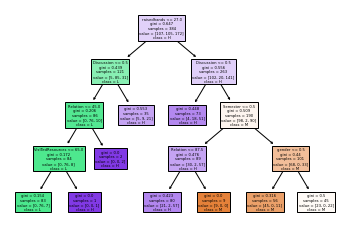

In [52]:
decisionTree = models['Decision Tree']
plot_tree(decisionTree, filled=True, feature_names = cols, class_names = labels)
plt.show()

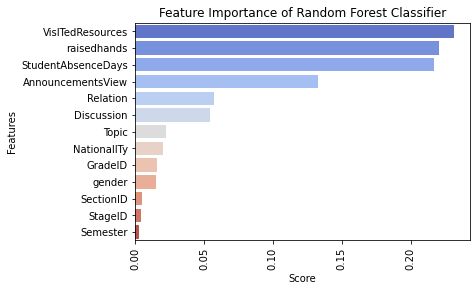

In [53]:
rfc = RandomForestClassifier(max_depth = 4,min_samples_split = 0.1, n_estimators = 200,random_state = 52 )
pred = rfc.fit(X_train, y_train).predict(X_test)
dn = {'features':Features.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h', palette='coolwarm')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

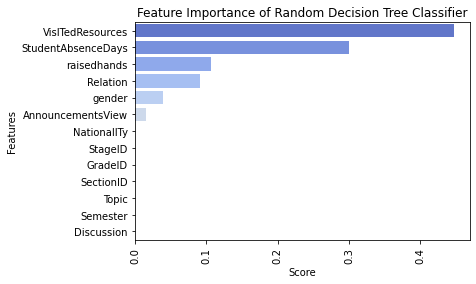

In [55]:
dt = DecisionTreeClassifier(max_depth = 4,min_samples_split = 0.2, random_state = 52)
pred = dt.fit(X_train, y_train).predict(X_test)
dn = {'features':Features.columns, 'score':dt.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h', palette='coolwarm')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Decision Tree Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()